# Imports


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten,BatchNormalization, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
import warnings
import glob
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Organize data into train and test dirs

In [2]:
os.chdir('D:/Projects/archive/PetImages')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('D:/Projects/archive/PetImages/cat/*'), 500):
        shutil.move(c, 'D:/Projects/archive/PetImages/train/cat')
    for c in random.sample(glob.glob('D:/Projects/archive/PetImages/dog/*'), 500):
        shutil.move(c, 'D:/Projects/archive/PetImages/train/dog')
    for c in random.sample(glob.glob('D:/Projects/archive/PetImages/cat/*'), 100):
        shutil.move(c, 'D:/Projects/archive/PetImages/valid/cat')
    for c in random.sample(glob.glob('D:/Projects/archive/PetImages/dog/*'), 100):
        shutil.move(c, 'D:/Projects/archive/PetImages/valid/dog')
    for c in random.sample(glob.glob('D:/Projects/archive/PetImages/cat/*'), 50):
        shutil.move(c, 'D:/Projects/archive/PetImages/test/cat')
    for c in random.sample(glob.glob('D:/Projects/archive/PetImages/dog/*'), 50):
        shutil.move(c, 'D:/Projects/archive/PetImages/test/dog')

In [3]:
train_path = 'D:/Projects/archive/PetImages/train'
valid_path = 'D:/Projects/archive/PetImages/valid'
test_path = 'D:/Projects/archive/PetImages/test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)
    

Found 1499 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
imgs, labels = next(train_batches)

# Plot Images

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

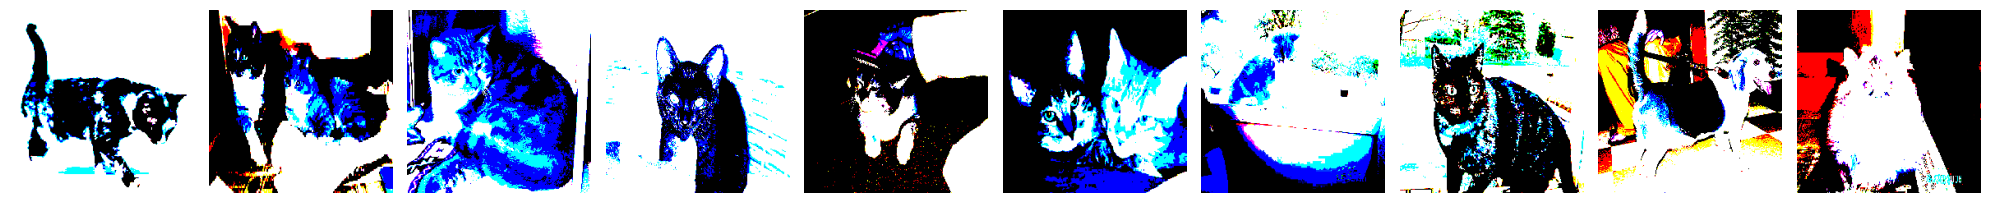

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [9]:
plotImages(imgs)
print(labels)

# Build and train CNN

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

Epoch 1/10
150/150 - 28s - loss: 14.3985 - accuracy: 0.6331 - val_loss: 6.4357 - val_accuracy: 0.5550 - 28s/epoch - 190ms/step
Epoch 2/10
150/150 - 21s - loss: 1.3414 - accuracy: 0.7825 - val_loss: 1.8726 - val_accuracy: 0.6950 - 21s/epoch - 138ms/step
Epoch 3/10
150/150 - 28s - loss: 0.3825 - accuracy: 0.9046 - val_loss: 2.3803 - val_accuracy: 0.6400 - 28s/epoch - 184ms/step
Epoch 4/10
150/150 - 27s - loss: 0.1039 - accuracy: 0.9606 - val_loss: 2.2818 - val_accuracy: 0.6600 - 27s/epoch - 183ms/step
Epoch 5/10
150/150 - 25s - loss: 0.0238 - accuracy: 0.9900 - val_loss: 1.6093 - val_accuracy: 0.6900 - 25s/epoch - 167ms/step
Epoch 6/10
150/150 - 25s - loss: 0.0070 - accuracy: 0.9980 - val_loss: 2.3460 - val_accuracy: 0.6350 - 25s/epoch - 165ms/step
Epoch 7/10
150/150 - 24s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.7571 - val_accuracy: 0.6850 - 24s/epoch - 161ms/step
Epoch 8/10
150/150 - 25s - loss: 9.3187e-04 - accuracy: 1.0000 - val_loss: 1.8347 - val_accuracy: 0.6700 - 25s/epoch 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

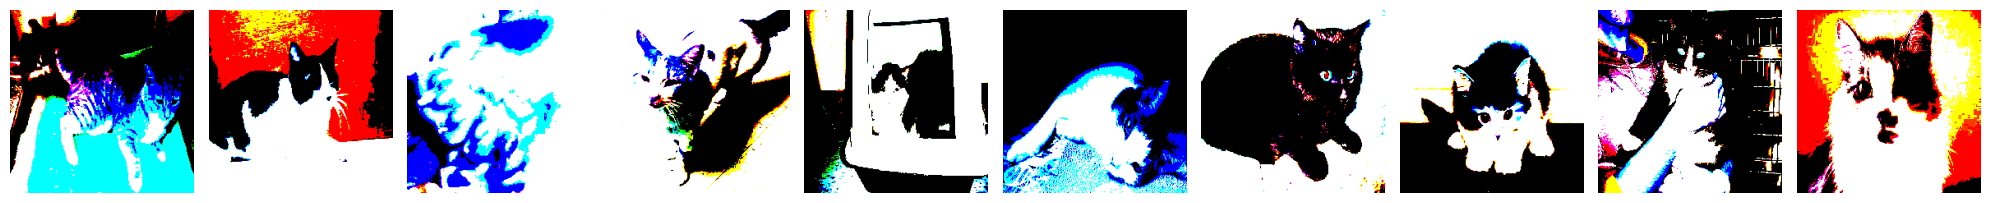

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Confusion matrix, without normalization
[[40 10]
 [21 29]]


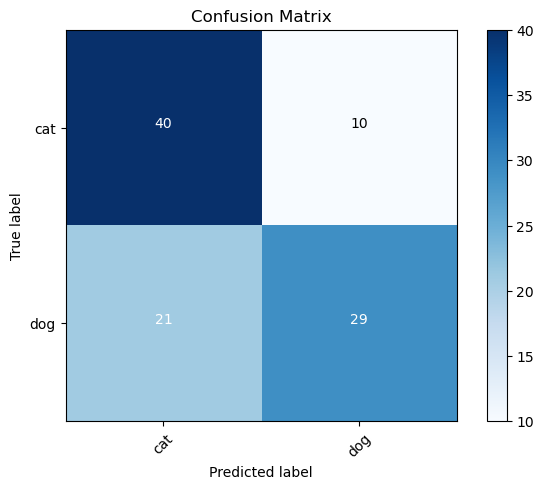

In [11]:

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

test_batches.classes

predictions = model.predict(x=test_batches, verbose=0)

np.round(predictions)

cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

def plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
    
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')
    
        print(cm)
    
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
